In [3]:
import os
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('training_solutions_rev1.csv')
train

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [3]:
train.shape

(61578, 38)

In [6]:
class1_df = train[['GalaxyID','Class1.1', 'Class1.2', 'Class1.3']]
class1_df

,GalaxyID,Class1.1,Class1.2,Class1.3
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161
...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000
61574,999950,0.901216,0.098784,0.000000
61575,999958,0.202841,0.777376,0.019783
61576,999964,0.091000,0.909000,0.000000


In [8]:
export_csv = class1_df.to_csv ('class1.csv', index=False)

In [4]:
sample_class_1 = train[['GalaxyID','Class1.1']].sort_values(ascending=False, by =['Class1.1']).head(100)
sample_class_2 = train[['GalaxyID','Class1.2']].sort_values(ascending=False, by =['Class1.2']).head(100)
sample_class_3 = train[['GalaxyID','Class1.3']].sort_values(ascending=False, by =['Class1.3']).head(100)
sample_class_1

,GalaxyID,Class1.1
39466,675202,1.0
22903,434670,1.0
55686,913723,1.0
40894,696039,1.0
54239,891579,1.0
...,...,...
26018,480384,1.0
6977,203026,1.0
8040,217984,1.0
54583,897154,1.0


In [5]:
import os
if not os.path.exists('./images_training_rev1/sample_class_1'):
    os.makedirs('./images_training_rev1/sample_class_1')
if not os.path.exists('./images_training_rev1/sample_class_2'):
    os.makedirs('./images_training_rev1/sample_class_2')
if not os.path.exists('./images_training_rev1/sample_class_3'):
    os.makedirs('./images_training_rev1/sample_class_3')

In [6]:
import shutil

for row in sample_class_1['GalaxyID']:
    path_img = f"./images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './images_training_rev1/sample_class_1')

In [7]:
for row in sample_class_2['GalaxyID']:
    path_img = f"./images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './images_training_rev1/sample_class_2')

In [8]:
for row in sample_class_3['GalaxyID']:
    path_img = f"./images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './images_training_rev1/sample_class_3')

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "./images_training_rev1/sample_class_3"

#function to load folder into arrays and then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
    return image_files

In [10]:
data= loadImages(image_path)

Original size (424, 424, 3)
RESIZED (220, 220, 3)


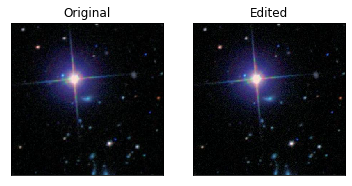

In [11]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()# Preprocessing
#def processing(data):
# loading image
# Getting 3 images to work with 
img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
print('Original size',img[0].shape)

# setting dim of the resize
height = 220
width = 220
dim = (width, height)
res_img = []
for i in range(len(img)):
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
    res_img.append(res)

# Checcking the size
print("RESIZED", res_img[1].shape)

# Visualizing one of the images in the array
original = res_img[1]
edited = img[1]
display(original, edited)

In [ ]:
# Crop image
crop_img = original[0:170, 0:170]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

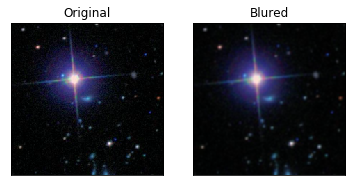

In [13]:
# Remove noise
# Gaussian
no_noise = []
for i in range(len(res_img)):
    blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
    no_noise.append(blur)

original = res_img[1]
image = no_noise[1]
display(original, image, 'Original', 'Blured')

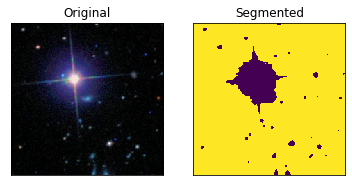

In [14]:
# Segmentation
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display(original, thresh, 'Original', 'Segmented')

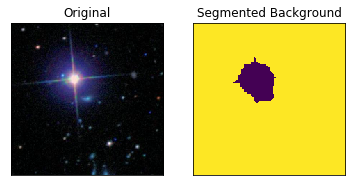

In [15]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(original, sure_bg, 'Original', 'Segmented Background')

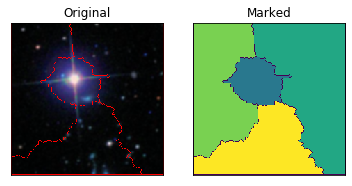

In [16]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Displaying markers on the image
display(image, markers, 'Original', 'Marked')